# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The original data and its details can be found [here](https://www.kaggle.com/joniarroba/noshowappointments). The data set consists of 110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. 
>
> Firstly, the data was cleaned to be ready for analysis. Next, data was visualized to show patterns between variables and answer some questions related to the effect of some variables on patients' no-show status. This study focused only on 3 variables; SMS_received, age, and disease history. Conclusions were eventually mentioed to show how the seleceted variables are related to the response variable and whether the questions are well answered. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create a function to set title and labels of histograms/bar plots
def complete_plot(title_,x_label,y_label):
    plt.title(title_)
    plt.xlabel(x_label)
    plt.ylabel(y_label);

<a id='wrangling'></a>
## 2. Data Wrangling

> Data wrangling is necessary to make the data ready for analysis. It starts with importing data, and then cleaning it against missing values, duplicates, and incorrect data types.

### 2.a. Data Importing

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('project_2_V1.csv')

### 2.b Data Cleaning
Firstly, data is explored to check for missing values.

In [4]:
# showing data information, number of columns and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It's clear from the above information that there are no missing values. However, Let's check if there are 'Age' values that are less than 0

In [5]:
#Check 'Age' values that are less than 0
len(df[df['Age']<0])

1

In [6]:
#Drop rows where 'Age' values that are less than 0
df.drop(labels=df[df['Age']<0].index, inplace = True)

In [7]:
# Check for duplicates
sum(df.duplicated())

0

Fortunately, there are no duplicated values in the data set. Although there are some incorrect data types, such as the 'ScheduledDay' and 'AppointmentDay' which should be converted into datetime, we don't need to use them in our study so we will keep them as they are. However, new features will be created in the Exploration section.

<a id='eda'></a>
## 3. Exploratory Data Analysis

> This section includes data vidualization and feature engineering. It aims at using the data to answer some questions related to the patients' 'no-show' status and its relationship with other variables. 

### 3.1 Research Question 1 (What is the relationship between the SMS_received and no-show status?)
Firstly, we need to check how many SMS_received observation types in the data set. Then we need to know the value counts in the data set in order to guarantee a fair comparison between them. 

In [8]:
# How many SMS_received types?
df['SMS_received'].unique()

array([0, 1], dtype=int64)

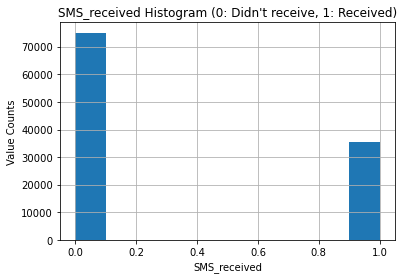

In [9]:
# Plot the value counts of the SMS_received
df['SMS_received'].hist()
complete_plot('SMS_received Histogram (0: Didn\'t receive, 1: Received)','SMS_received','Value Counts')

There are only two types of SMS_received. It's shown from the histogram above that the number of people who didn't receive SMS is about twice the number of those who didn't receive. Hence, we need to link the no-show status to the proportions of the two possibilities rather than the value counts.

In [10]:
# Calculate the total number of the two possibilities
total_received = df['SMS_received'].value_counts()[1]
total_not_received = df['SMS_received'].value_counts()[0]

In [11]:
# Calculate the number of patients whose status is no-show and whether they received SMS or not
no_show_received = df[df['No-show']=='Yes']['SMS_received'].value_counts()[1]
no_show_not_received = df[df['No-show']=='Yes']['SMS_received'].value_counts()[0]

In [12]:
# Calculate the proportions of the two possibilities
prop_received = no_show_received/total_received
prop_not_received = no_show_not_received/total_not_received

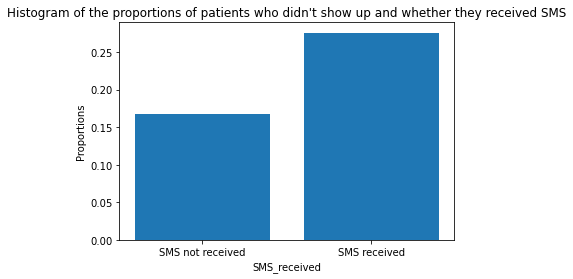

In [13]:
# plot the proportions
plt.bar([1,2],[prop_not_received,prop_received],tick_label=['SMS not received','SMS received'])
complete_plot('Histogram of the proportions of patients who didn\'t show up and whether they received SMS','SMS_received','Proportions')

The above histogram shows a weired observation. The propotion of patients who didn't show up and received SMS is higher than those who neither showed up nor received SMS. 

### Research Question 2  (What is the relationship between the age and no-show status?)
In order to answer this question, we need to know the statistical information of the 'Age' variable as well as show it in a histogram.

In [14]:
# statistics of 'Age' Variable
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

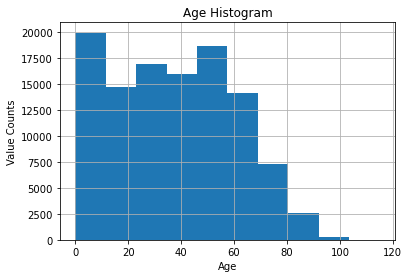

In [15]:
# Age histogram
df['Age'].hist()
complete_plot('Age Histogram','Age','Value Counts')

The above histogram tells that the distribution of age is left-skewed. This means that most of the reservations are for younger people. The minimum age is 0, which is for sure less than one year, while the mean age is 37. In order to link the age to the no-show status, we need first to categorize the 'Age' variable into 4 levels.

In [16]:
# categorize the 'Age' variable
bin_edges = [0.,18.,37.,55.,115.]
bin_labels = ['child','young','adult','old']
df['Age Levels'] = pd.cut(df['Age'], bin_edges, labels = bin_labels)

In [17]:
# explore the relationship between the age levels and no-show status
# Value counts of the age levels
total_counts = df['Age Levels'].value_counts()

In [18]:
#The number of total 
noshow_counts= df[df['No-show']=='Yes']['Age Levels'].value_counts()

In [19]:
# The proportions of each age level who didn't show up 
props = noshow_counts/total_counts

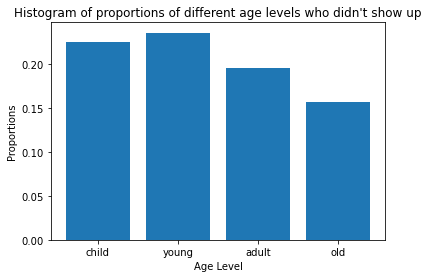

In [20]:
# histogram of proportions of different age levels who didn't show up
plt.bar([1,2,3,4],[props[0],props[1],props[2],props[3]],tick_label=['child', 'young', 'adult', 'old'])
complete_plot('Histogram of proportions of different age levels who didn\'t show up','Age Level','Proportions')

The bar chart above shows that the possibility of not showing up is higher for younger people compared to older people.

### Research Question 3  (What is the relationship between the disease history and no-show status?)
Let's group the data so that we know the number of no-show status for patients and whether they have hipertension and/or diabetes. We have to create a new variable called 'Disease History' that adds up the variables 'Hipertension' and 'Diabetes'

In [21]:
# create a new variable called 'Disease History' that adds up the variables 'Hipertension' and 'Diabetes'
df['Disease History']=df['Hipertension']+df['Diabetes']
# Value counts of 'Disease History'
df['Disease History'].value_counts()

0    87268
1    16772
2     6486
Name: Disease History, dtype: int64

The 'Disease History' counts show that the number of patients not having disease history is about 4 times that of the patients having diabetes and/or hipertension. Accordingly, we need to calculate the proportion of each category to guarantee a fair comparison between them.

In [22]:
# counts of patients in terms of disease history and no-show status
counts = df.groupby(['Disease History','No-show']).count()['Age']
counts

Disease History  No-show
0                No         69010
                 Yes        18258
1                No         13852
                 Yes         2920
2                No          5345
                 Yes         1141
Name: Age, dtype: int64

In [23]:
# counts of patients in terms of disease history
totals = df.groupby(['Disease History']).count()['Age']
totals

Disease History
0    87268
1    16772
2     6486
Name: Age, dtype: int64

In [24]:
# calculate proportion of each category
proprtions = counts/totals
proprtions

Disease History  No-show
0                No         0.790782
                 Yes        0.209218
1                No         0.825900
                 Yes        0.174100
2                No         0.824083
                 Yes        0.175917
Name: Age, dtype: float64

In [25]:
# split the proportions of each disease category
zero_prop = proprtions[0]
one_prop = proprtions[1]
two_prop = proprtions[2]
two_prop

No-show
No     0.824083
Yes    0.175917
Name: Age, dtype: float64

In [26]:
# define the x locations
ind = np.arange(len(zero_prop))

In [28]:
#define width of bars
width = 0.2
#define x-tick locations
locations = (2*ind+2*width)/2

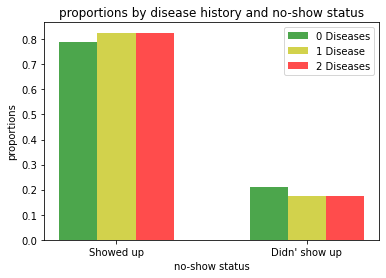

In [30]:
#Define the bar of each disease category
zero_bar = plt.bar(ind,zero_prop,width,color='g',alpha=0.7,label='0 Diseases')
one_bar = plt.bar(ind+width,one_prop,width,color='y',alpha=0.7,label='1 Disease')
two_bar = plt.bar(ind+2*width,two_prop,width,color='r',alpha=0.7,label='2 Diseases')
#define title and labels
complete_plot('proportions by disease history and no-show status','no-show status','proportions')
#define x-tick and legend
plt.xticks(locations,['Showed up','Didn\' show up'])
plt.legend();

The bar diagram above shows that patients who don't have disease history are less likely to show up compared to those who have one or more diseases. 

<a id='conclusions'></a>
## Conclusions

> The study answered two questions focusing on the effect of SMS-received, age, and disease-history variables on the no-show status. The propotion of patients who didn't show up and received SMS is higher than those who neither showed up nor received SMS. This finding is weird and not logic because people who receives SMS should be more likely to show up. However, the gathered data might be inaccurate or some patients might not check their SMS. The second finding is that the possibility of not showing up is higher for younger people compared to older people. The final observation is that patients who don't have disease history are less likely to show up compared to those who have one or more diseases.